<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/FCNN_Tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

👉 **TensorFlow** is a deep learning framework by Google that allows you to build, train, and deploy neural networks efficiently.

👉 **Keras** is a high-level API built on TensorFlow that makes deep learning easier to implement

A typical deep learning workflow in Keras follows these steps:
1.   **Prepare Data** - Load and preprocess data.
2.   **Build Model** - Define the neural network architecture.
3.   **Compile Model** - Choose an optimizer and loss function.
4.   **Train Model** - Use data to update weights.
5.   **Evaluate Model** - Check performance on test data.
6.   **Make Predictions** - Use the model to predict new data.

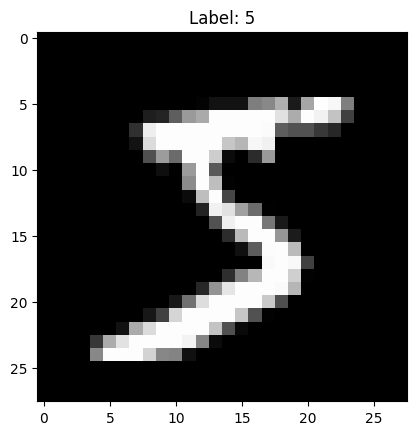

In [9]:
#We will build a fully connected neural network (FCNN) to classify the MNIST handwritten digits dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Step 2: Load and Preprocess the Data
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()
## Normalize the pixel values (0-255) to the range (0-1)
#🔹 Why Normalize?
# Neural networks train better when input values are in the range 0 to 1, making optimization more stable.
x_train, x_test=x_train/255.0, x_test/255.0
# Display an example image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

**Step 3: Define the Neural Network Model**

We create a fully connected neural network with the following layers:


1.   Flatten Layer (converts 28x28 images into a 1D array of 784 pixels)
2.   Hidden Layer (128 neurons, ReLU activation)
3.   Output Layer (10 neurons, Softmax activation)

In [10]:
# Build the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Why ReLU? It helps the model learn complex patterns.
# Why Softmax? It converts outputs into probabilities for each digit (0-9).

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 4: Compile the Model**
We need to specify:

Loss Function → sparse_categorical_crossentropy for multi-class classification.

Optimizer → adam for adaptive learning.

Metrics → Track accuracy.


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#We train the model for 10 epochs, meaning it will see the entire dataset 10 times.
model.fit(x_train, y_train, epochs=10)
# 🛠 Behind the scenes: 1️⃣ Forward propagation computes predictions.
# 2️⃣ Loss function calculates errors.
# 3️⃣ Backpropagation updates weights using Adam optimizer.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8769 - loss: 0.4286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9629 - loss: 0.1223
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9758 - loss: 0.0809
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9823 - loss: 0.0569
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9896 - loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9924 - loss: 0.0259
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9947 - loss: 0.0176
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9954 - loss: 0.0157


In [13]:
# Step 6: Evaluate the Model
# After training, we test it on unseen data.
test_loss, test_acc=model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
# If the accuracy is above 97%, the model is performing well!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1027
Test accuracy: 0.9781000018119812


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


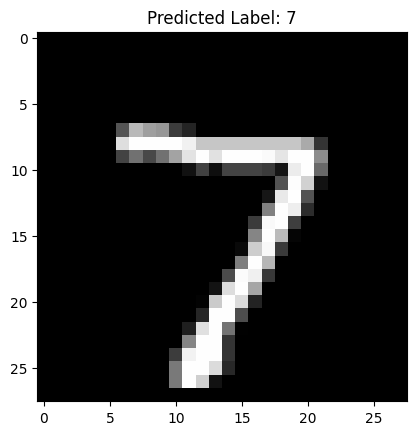

In [16]:
# Step 7: Make Predictions
# We can use the trained model to classify new digits.
predictions = model.predict(x_test)

# Display the first test image and predicted label
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
# np.argmax(predictions[0]) finds the class with the highest probability.
plt.show()


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)